# DOJO CargoX - Data Science

## O que deverá ser feito? 

Esse desafio consiste em um _dataset_ que nós gostariamos que você estudasse e propusesse um modelo preditivo.

### Objetivos

* Analisar os dados, apresentar o que foi encontrado e decisões tomadas e,
* Construir um modelo preditivo em cima dos dados do desafio

Vale ressaltar que **não existe resposta certa** para o desafio, e que o
trabalho e o processo para realizar esses dois objetivos são tão importantes
quanto o resultado final.

---

# A Seguradora Thomas Andrews

Você trabalha para a Seguradora Thomas Andrews, responsável por segurar os
passageiros dos [três Transatlânticos da Classe
_Olympic_](https://en.wikipedia.org/wiki/Olympic-class_ocean_liner) da companhia
inglesa [White Star Line](https://en.wikipedia.org/wiki/White_Star_Line).

Infelizmente, a segunda embarcação da White Star Line, o [RMS
Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) afundou em sua viagem
inaugural. Muitos passageiros faleceram pela falta de botes salva-vidas
suficientes na embarcação, levando a um enorme prejuízo para a Thomas Andrews.

## Seria possível evitar tragédias? 

Para evitar futuras tragédias -financeiras para a empresa, no caso- a Diretoria
da Thomas Andrews está pedindo um modelo para tentar prever quais passageiros
podem vir a falecer nas próximas viagens, para cobrar um _premium_ sobre seu
seguro, ou até impedir eles de embarcar!

Para isso, a seguradora está disponibilizando dois arquivos com dados do
Titanic para seu trabalho:

* passageiros que a companhia sabe se sobreviveram ou não (`train.csv`),
* passageiros que a companhia tem dados, mas desconhece o destino (`test.csv`)

Existe mais um arquivo em anexo, o `variables.txt` que descreve os campos que
você encontra nas duas listagens de passageiros.

A partir dessas informações, a Diretoria espera que você entenda o dados
coletados e modele algo que possa ajudar a companhia previnir futuras perdas!

## Próxima reunião da Diretoria

É esperado que você apresente seus resultados na próxima reunião da Diretoria da
Thomas Andrews. A apresentação não é formal, mas você precisa mostrar seu
progresso e suas decisões ao longo do caminho.

Boa sorte e até a próxima reunião!

---
## Variáveis
survived:
  * se o passageiro sobreviveu ou não
  * valores possíveis:
    0 = Não
    1 = Sim

pclass:
  * classe da Passagem no navio
  * valores possíveis:
    1 = primeira classe,
    2 = classe executiva,
    3 = classe economica

sex:
  * o genero do passageiro

Age:
  * idade em anos

sibsp
  * numero de irmaos/companheiros dentro do navio

parch:
  * numero de parentes e filhos no navio

ticket:
  * codigo da passagem

fare:
  * valor da passagem

cabin:
  * número da cabine

embarked:
  * local onde embarcou no Titanic
  * possiveis valores: 
    C = Cherbourg,
    Q = Queenstown,
    S = Southampton



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import path

In [3]:
df_train = pd.read_csv("train.csv")
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",woman,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
df_train["age"].unique()

array([  22.  ,   38.  ,   26.  ,   35.  ,     nan,   54.  ,    2.  ,
         27.  ,   14.  ,    4.  ,   58.  ,   20.  ,   39.  ,   55.  ,
         31.  ,   34.  ,   15.  ,   28.  ,    8.  ,   19.  ,   40.  ,
        117.  ,   42.  ,   21.  ,   18.  ,    3.  ,    7.  ,   49.  ,
         29.  ,   65.  ,   28.5 ,    5.  ,   11.  ,   45.  ,   17.  ,
         32.  ,   16.  ,   25.  ,    0.83,   30.  ,   33.  ,   23.  ,
         24.  ,   46.  ,   59.  ,   71.  ,   37.  ,   47.  ,   14.5 ,
         70.5 ,   32.5 ,   12.  ,    9.  ,   36.5 ,   51.  ,  194.  ,
         40.5 ,   44.  ,    1.  ,   61.  ,   56.  ,   50.  ,   36.  ,
         45.5 ,   20.5 ,   62.  ,   41.  ,   52.  ,   63.  ,   23.5 ,
          0.92,   43.  ,   60.  ,   10.  ,   64.  ,   13.  ,   48.  ,
          0.75,   53.  ,   57.  ,   80.  ,   70.  ,   24.5 ,    6.  ,
          0.67,   30.5 ,    0.42,   34.5 ,   74.  ])

In [6]:
df_train["age"].describe()

count    748.000000
mean      29.777634
std       15.842432
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max      194.000000
Name: age, dtype: float64

In [7]:
df_train["sex"].unique()

array(['male', 'Female ', 'women', 'female_', 'male ', 'woman', ' male',
       'man', 'female', 'mal', nan, 'Male', ' female  '], dtype=object)

In [8]:
sex_dict = {
    'male': 'male',
    'male ': 'male',
    ' male': 'male',
    'man': 'male',
    'mal': 'male',
    'Male': 'male',
    'Female ': 'female',
    'female_': 'female',
    'women': 'female',
    'woman': 'female',
    'female  ': 'female'
}

In [11]:
df_train["sex"] = df_train["sex"].map(sex_dict)

In [14]:
df_train["sex"].isna().sum()

172

In [15]:
df_train[df_train["sex"].isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
15,16,1,2.0,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",NaN,31.0,1,0,345763,18.0000,NaN,S
25,26,1,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,38.0,1,5,347077,31.3875,NaN,S
33,34,0,2.0,"Wheadon, Mr. Edward H",NaN,117.0,0,0,C.A. 24579,10.5000,NaN,S
40,41,0,3.0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",NaN,40.0,1,0,7546,9.4750,NaN,S
43,44,1,2.0,"Laroche, Miss. Simonne Marie Anne Andree",NaN,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
44,45,1,3.0,"Devaney, Miss. Margaret Delia",NaN,19.0,0,0,330958,7.8792,NaN,Q
49,50,0,3.0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,18.0,1,0,349237,17.8000,NaN,S
52,53,1,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",NaN,49.0,1,0,PC 17572,76.7292,D33,C
53,54,1,2.0,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",NaN,29.0,1,0,2926,26.0000,NaN,S


In [24]:
df_train[df_train["sex"].isna()]["name"].str.split(", ").iloc[1]

['Vander Planke', 'Mrs. Julius (Emelia Maria Vandemoortele)']

In [29]:
df_train[df_train["sex"].isna()]["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

15        Mrs
18        Mrs
25        Mrs
33         Mr
40        Mrs
43       Miss
44       Miss
49        Mrs
52        Mrs
53        Mrs
58       Miss
61       Miss
66        Mrs
67         Mr
71       Miss
81         Mr
85        Mrs
98        Mrs
100      Miss
113      Miss
128      Miss
132       Mrs
136      Miss
140       Mrs
147      Miss
151       Mrs
156      Miss
166       Mrs
177      Miss
180      Miss
        ...  
792      Miss
800        Mr
809       Mrs
816      Miss
827    Master
829       Mrs
841        Mr
847        Mr
849       Mrs
853      Miss
856       Mrs
857        Mr
858       Mrs
865       Mrs
868        Mr
871       Mrs
874       Mrs
875      Miss
880       Mrs
884        Mr
885       Mrs
887      Miss
889        Mr
891    Master
897      Miss
899      Miss
900      Miss
903      Miss
906      Miss
920      Miss
Name: name, Length: 172, dtype: object

In [30]:
df_train["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
906      Miss
907        Mr
908      Miss
909       Rev
910        Mr
911        Mr
912        Mr
913      Miss
914        Mr
915        Mr
916    Master
917       Don
918        Mr
919    Master
920      Miss
921        Mr
922      Miss
923        Mr
924      Miss
925        Mr
926        Mr
927        Mr
928      Miss
929      Miss
930        Mr
931        Mr
932        Mr
933        Mr
934        Mr
935       Mrs
Name: name, Length: 936, dtype: object

In [33]:
df_train["title"]=df_train["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

In [34]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [35]:
df_train["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [36]:
df_train["title"].value_counts()

Mr              541
Miss            197
Mrs             126
Master           43
Rev               7
Dr                7
Don               2
Major             2
Col               2
Mlle              2
the Countess      1
Ms                1
Sir               1
Lady              1
Jonkheer          1
Capt              1
Mme               1
Name: title, dtype: int64

In [37]:
df_train[df_train["sex"].isna()]["title"].value_counts()

Miss            77
Mrs             60
Mr              26
Master           4
Mlle             2
Mme              1
Major            1
the Countess     1
Name: title, dtype: int64

In [40]:
title_dict = {
    'Miss': 'female',
    'Mrs': 'female',
    'Mr': 'male',
    'Master':'male',
    'Mlle':'female',
    'Mme':'female',
    'Major':'male',
    'the Countess':'female'
}

In [41]:
df_train[df_train["sex"].isna()] = df_train["title"].map(title_dict)

ValueError: Must have equal len keys and value when setting with an iterable

In [42]:
mask = df_train["sex"].isna()

In [43]:
df_train[mask] 

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
15,16,1,2.0,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S,Mrs
18,19,0,3.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",NaN,31.0,1,0,345763,18.0000,NaN,S,Mrs
25,26,1,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,38.0,1,5,347077,31.3875,NaN,S,Mrs
33,34,0,2.0,"Wheadon, Mr. Edward H",NaN,117.0,0,0,C.A. 24579,10.5000,NaN,S,Mr
40,41,0,3.0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",NaN,40.0,1,0,7546,9.4750,NaN,S,Mrs
43,44,1,2.0,"Laroche, Miss. Simonne Marie Anne Andree",NaN,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Miss
44,45,1,3.0,"Devaney, Miss. Margaret Delia",NaN,19.0,0,0,330958,7.8792,NaN,Q,Miss
49,50,0,3.0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,18.0,1,0,349237,17.8000,NaN,S,Mrs
52,53,1,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",NaN,49.0,1,0,PC 17572,76.7292,D33,C,Mrs
53,54,1,2.0,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",NaN,29.0,1,0,2926,26.0000,NaN,S,Mrs


In [45]:
df_train[mask]["title"].map(title_dict)

15     female
18     female
25     female
33       male
40     female
43     female
44     female
49     female
52     female
53     female
58     female
61     female
66     female
67       male
71     female
81       male
85     female
98     female
100    female
113    female
128    female
132    female
136    female
140    female
147    female
151    female
156    female
166    female
177    female
180    female
        ...  
792    female
800      male
809    female
816    female
827      male
829    female
841      male
847      male
849    female
853    female
856    female
857      male
858    female
865    female
868      male
871    female
874    female
875    female
880    female
884      male
885    female
887    female
889      male
891      male
897    female
899    female
900    female
903    female
906    female
920    female
Name: title, Length: 172, dtype: object

In [56]:
df_train[mask]["sex"] = df_train[mask]["title"].map(title_dict)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_train["sex"].isna().sum()

172

In [54]:
df_train.loc[mask,"sex"] = df_train[mask]["title"].map(title_dict)

In [57]:
df_train["sex"].isna().sum()

0

In [59]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [67]:
df_train.groupby(["sex","survived"])["passengerid"].count()

sex     survived
female  0            85
        1           245
male    0           491
        1           115
Name: passengerid, dtype: int64

In [68]:
df_train["age"].isna().sum()

188

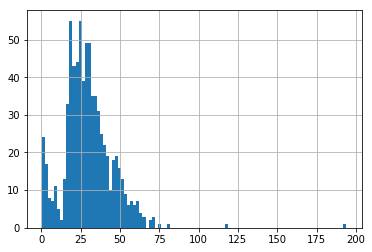

In [70]:
df_train["age"].hist(bins=100)

In [71]:
df_train["age"].median()

28.0

In [74]:
df_train = df_train[df_train["age"]<100]
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


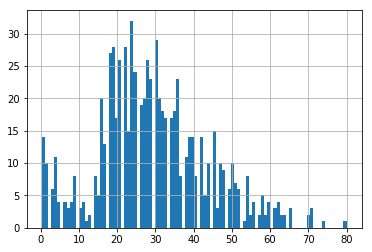

In [76]:
df_train["age"].hist(bins=100)

In [77]:
df_train["age"].median()

28.0

In [80]:
df_aux = df_train["age"].apply(lambda x: df_train["age"].median() if np.isnan(x) else x)

In [82]:
df_train["age"] = df_aux

In [83]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
10,11,1,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss


In [85]:
df_train["age"].isna().sum()

0

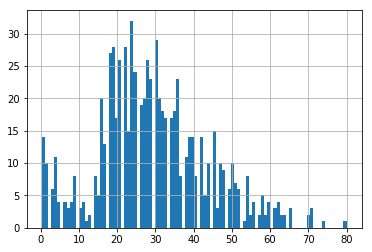

In [87]:
df_train["age"].hist(bins=100)

In [88]:
df_train.groupby(["age","survived"])["passengerid"].count()

age    survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   0           2
       1           5
2.00   0           7
       1           3
3.00   0           1
       1           5
4.00   0           4
       1           7
5.00   1           4
6.00   0           1
       1           3
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           3
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           4
14.50  0           1
                  ..
50.00  0           5
       1           5
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
56.00  0           2
       1           2
57.00  0           2
58.00  0           2
       1          

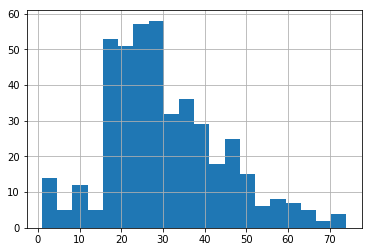

In [89]:
df_train[df_train["survived"]==0]["age"].hist(bins=20)

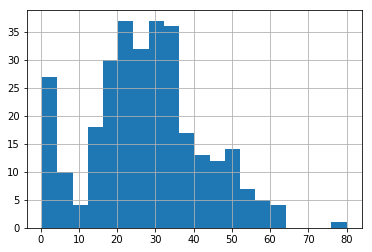

In [90]:
df_train[df_train["survived"]==1]["age"].hist(bins=20)